In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [105]:
col = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'MEDV']

In [106]:
len(col)

11

In [107]:
df.columns = col

In [108]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,MEDV
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [109]:
df.shape

(1012, 11)

In [53]:
df.dropna(inplace= True)

<Axes: >

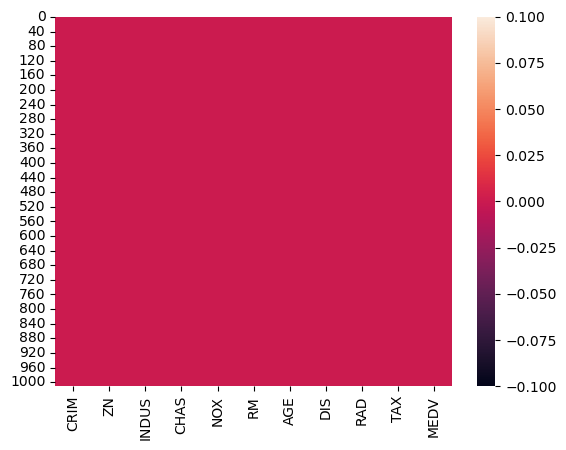

In [54]:
sns.heatmap(df.isnull())

In [55]:
df.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
MEDV     0
dtype: int64

In [67]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [70]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX'], dtype='object')

In [71]:
y

0       15.3
2       17.8
4       17.8
6       18.7
8       18.7
        ... 
1002    21.0
1004    21.0
1006    21.0
1008    21.0
1010    21.0
Name: MEDV, Length: 506, dtype: float64

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
mse = cross_val_score(linear_regressor, x, y, scoring='neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-3.6049357455331354


In [73]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [74]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-3.585968471408159


In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring= 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x, y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

E:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.072e+02, tolerance: 2.062e-01
  model = cd_fast.enet_coordinate_descent(
E:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.826e+02, tolerance: 1.634e-01
  model = cd_fast.enet_coordinate_descent(
E:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.261e+02, tolerance: 2.097e-01
  model = cd_fast.enet_coo

{'alpha': 1e-15}
-3.6049357455331767
